In [111]:
'''
   Tema: Emissão de poluentes no Brasil
   Grupo: Lucas Ribeiro e Mônica Torres
   Fonte do dataset: http://dados.gov.br/dataset/emissoes-de-poluentes-atmosfericos
   Repositório: https://github.com/lrsonnewend/Trabalho-Estatistica
'''

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy import stats
import statistics 
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [112]:
dados = pd.read_csv('poluentes.csv', sep=';')
dados.head(30)

,CNPJ,Razão Social,Estado,Município,Código da Categoria,Categoria de Atividade,Código do Detalhe,Detalhe,Ano,Poluente emitido,Quantidade,Metodologia utilizada,Situação Cadastral
0,00.003.390/0001-53,BIDY TECNOLOGIA DE COSMÉTICOS LTDA,SAO PAULO,JAGUARIUNA,15,Indústria Química,14,Fabricação de perfumarias e cosméticos,2014,Material Particulado (MP),"0,07",Estimativa,Ativa
1,00.003.390/0001-53,BIDY TECNOLOGIA DE COSMÉTICOS LTDA,SAO PAULO,JAGUARIUNA,15,Indústria Química,14,Fabricação de perfumarias e cosméticos,2015,Material Particulado (MP),"0,07",Estimativa,Ativa
2,00.003.390/0001-53,BIDY TECNOLOGIA DE COSMÉTICOS LTDA,SAO PAULO,JAGUARIUNA,15,Indústria Química,14,Fabricação de perfumarias e cosméticos,2016,Material Particulado (MP),"0,08",Estimativa,Ativa
3,00.006.027/0001-91,"SERQUIMICA IND., COM., IMP. E EXP. DE PROD QUI...",SAO PAULO,SERTAOZINHO,15,Indústria Química,1,Produção de substâncias e fabricação de produt...,2014,Monóxido de carbono (CO),"3,00",Estimativa,Ativa
4,00.006.027/0001-91,"SERQUIMICA IND., COM., IMP. E EXP. DE PROD QUI...",SAO PAULO,SERTAOZINHO,15,Indústria Química,1,Produção de substâncias e fabricação de produt...,2015,Monóxido de carbono (CO),"3,00",Estimativa,Ativa
5,00.006.027/0001-91,"SERQUIMICA IND., COM., IMP. E EXP. DE PROD QUI...",SAO PAULO,SERTAOZINHO,15,Indústria Química,1,Produção de substâncias e fabricação de produt...,2016,Monóxido de carbono (CO),"3,00",Estimativa,Ativa
6,00.006.027/0001-91,"SERQUIMICA IND., COM., IMP. E EXP. DE PROD QUI...",SAO PAULO,SERTAOZINHO,15,Indústria Química,1,Produção de substâncias e fabricação de produt...,2017,Monóxido de carbono (CO),"3,00",Estimativa,Ativa
7,00.007.041/0001-00,TORREFAÇÃO BEM BRASIL LTDA,SAO PAULO,GUAPIACU,16,Indústria de Produtos Alimentares e Bebidas,1,"Beneficiamento, moagem, torrefação e fabricaçã...",2017,Material Particulado (MP),"0,20",Estimativa,Ativa
8,00.010.640/0001-82,POLY SELL PRODUTOS QUÍMICOS LTDA.,SAO PAULO,LOUVEIRA,15,Indústria Química,12,Fabricação de produtos farmacêuticos e veterin...,2013,Material Particulado (MP),"0,00",Estimativa,Ativa
9,00.010.640/0001-82,POLY SELL PRODUTOS QUÍMICOS LTDA.,SAO PAULO,LOUVEIRA,15,Indústria Química,12,Fabricação de produtos farmacêuticos e veterin...,2013,Material Particulado (MP),"0,00",Estimativa,Ativa


In [113]:

qtdPolu = np.array(dados['Quantidade'].values)

for i in range(len(qtdPolu)):
    qtdPolu[i] = qtdPolu[i].replace('.', '')
    qtdPolu[i] = qtdPolu[i].replace(',', '.')
    
qtdPolu = qtdPolu.astype(np.float)

mean = np.mean(qtdPolu)

print('Quantidade de registros de poluentes: ', len(qtdPolu))
print('\nMédia: %.2f' %np.mean(qtdPolu))
print('Mediana: ', np.median(qtdPolu))
print('Moda: ',statistics.mode(qtdPolu))
print('Desvio padrão: %.2f' %np.std(qtdPolu))
print('Coeficiente da variação: %.2f' %((np.std(qtdPolu)/np.mean(qtdPolu)) * 100))
print('Variância da quantidade de poluentes: %.2f '%statistics.variance(qtdPolu))
print('Dispersão: ', max(qtdPolu) - min(qtdPolu))


Quantidade de registros de poluentes:  69353

Média: 4300070.55
Mediana:  1.68
Moda:  0.01
Desvio padrão: 719327951.33
Coeficiente da variação: 16728.28
Variância da quantidade de poluentes: 517440162526492672.00 
Dispersão:  167152926186.0


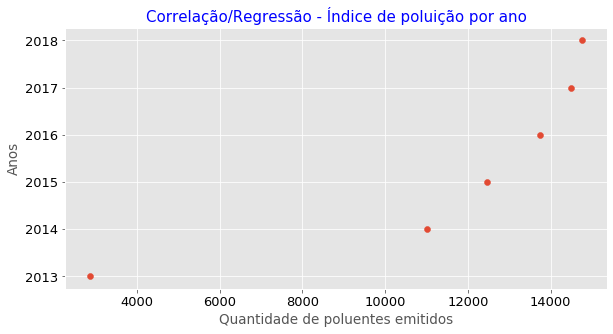

In [114]:
plt.style.use('ggplot')
ano = pd.value_counts(dados['Ano']).values
plt.rcParams['figure.figsize'] = (9.7,4.8)
plt.rcParams['figure.facecolor'] = 'white'
quant = [ano[5], ano[4], ano[3], ano[2], ano[1], ano[0]]
years = ['2013', '2014', '2015', '2016', '2017', '2018']

plt.scatter(quant, years)

plt.xlabel('Quantidade de poluentes emitidos', fontsize = 13.5)
plt.ylabel('Anos', fontsize = 13.5)

plt.xticks(fontsize = 13, color = 'black')
plt.yticks(fontsize = 13, color = 'black')

plt.title('Correlação/Regressão - Índice de poluição por ano', color = 'blue', fontsize = 15)
plt.show()


In [115]:
#PROBABILIDADE - RESOLVENDO EXERCÍCIOS À PARTE 

#No lançamento de dois dados perfeitos,
#qual a probabilidade de que a soma dos resultados obtidos seja igual a 6?

#P(a) = n(a)/n(s)

#possíveis resultados
espacoAmostral = 6*6

#eventos que são favoráveis para soma ser igual a 6
eventoFavoravel = [(1,5), (3,3), (2,4), (4,2),(5,1)]

pA = (len(eventoFavoravel)/espacoAmostral) * 100

print('Probabilidade do evento ocorrer: %.2f'%pA,'%')

Probabilidade do evento ocorrer: 13.89 %


In [116]:
def fat(n):
    fat = 1
    i = 2
    while i <= n:
        fat = fat*i
        i = i + 1
    return fat


#Um teste de múltipla escolha é composto de 12 questões, 
#com 5 alternativas de resposta, sendo que somente uma, é correta.  
#Calcule a probabilidade de uma pessoa, marcando aleatoriamente as 12 questões, acertar metade das respostas.

#As chances de acerto são 1 em 5, que corresponde a 0,2 ou 20%.
chanceAcerto = 1/5

#As chances de erro são 4 em 5, que corresponde a 08 ou 80%.
chanceErro = 4/5

#formula do método binominal - considerando p = acerto e q = erro
#(n/k)*p^k * q^n-k
n = 12
k = 6
aux = n-k

probab = (fat(n)/(fat(k) * fat(n-k))) * (pow(chanceAcerto, k) * pow(chanceErro, (k-n)))

print('Probabilidade de %.2f'%(result*100),'%')

Probabilidade de 22.56 %


Text(0, -1.3, '11.632')

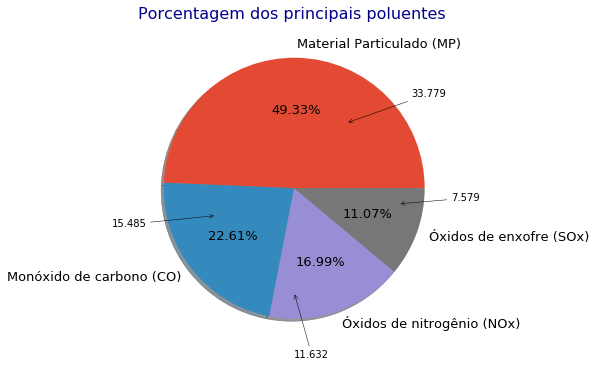

In [117]:
poluentes = pd.value_counts(dados['Poluente emitido'])
poluentes = poluentes[:4]
poluentes

plt.style.use("ggplot")
poluentes.plot(kind='pie', subplots=True, shadow = True,
               label = "",  fontsize = 13,figsize=(11, 6), autopct='%.2f%%')
plt.title("Porcentagem dos principais poluentes ", fontsize = 16, color = 'darkblue')

plt.annotate("33.779", xy=(0.4, 0.5),
            xycoords='data',
            xytext=(0.9, 0.7),
            textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "black"))


plt.annotate("15.485", xy=(-0.6, -0.21),
            xycoords='data',
            xytext=(-1.4, -0.3),
            textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "black"))


plt.annotate("7.579", xy=(0.8, -0.12),
            xycoords='data',
            xytext=(1.2, -0.1),
            textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "black"))


plt.annotate("11.632", xy=(0, -0.8),
            xycoords='data',
            xytext=(0, -1.3),
            textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "black"))

In [118]:
municipioPolu = pd.value_counts(dados['Município'])
municipioPolu = municipioPolu[:30].sort_values(ascending=[True])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text xticklabel objects>)

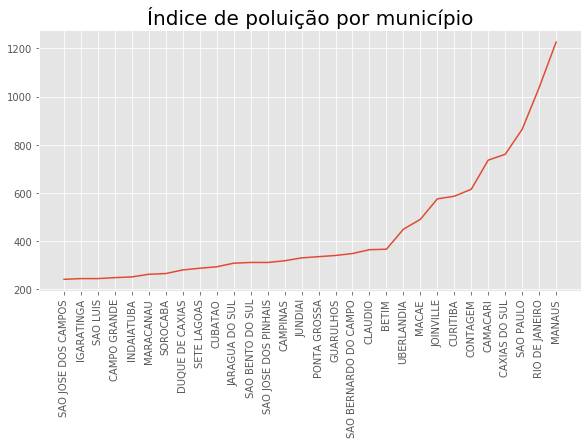

In [119]:
plt.style.use("ggplot")
plt.plot(municipioPolu)
plt.title('Índice de poluição por município', fontsize = 20)
plt.xticks(rotation=90)